# Gemini 3 with LangChain - Bootcamp

This notebook demonstrates all key features of Google's Gemini 3 model family using LangChain.

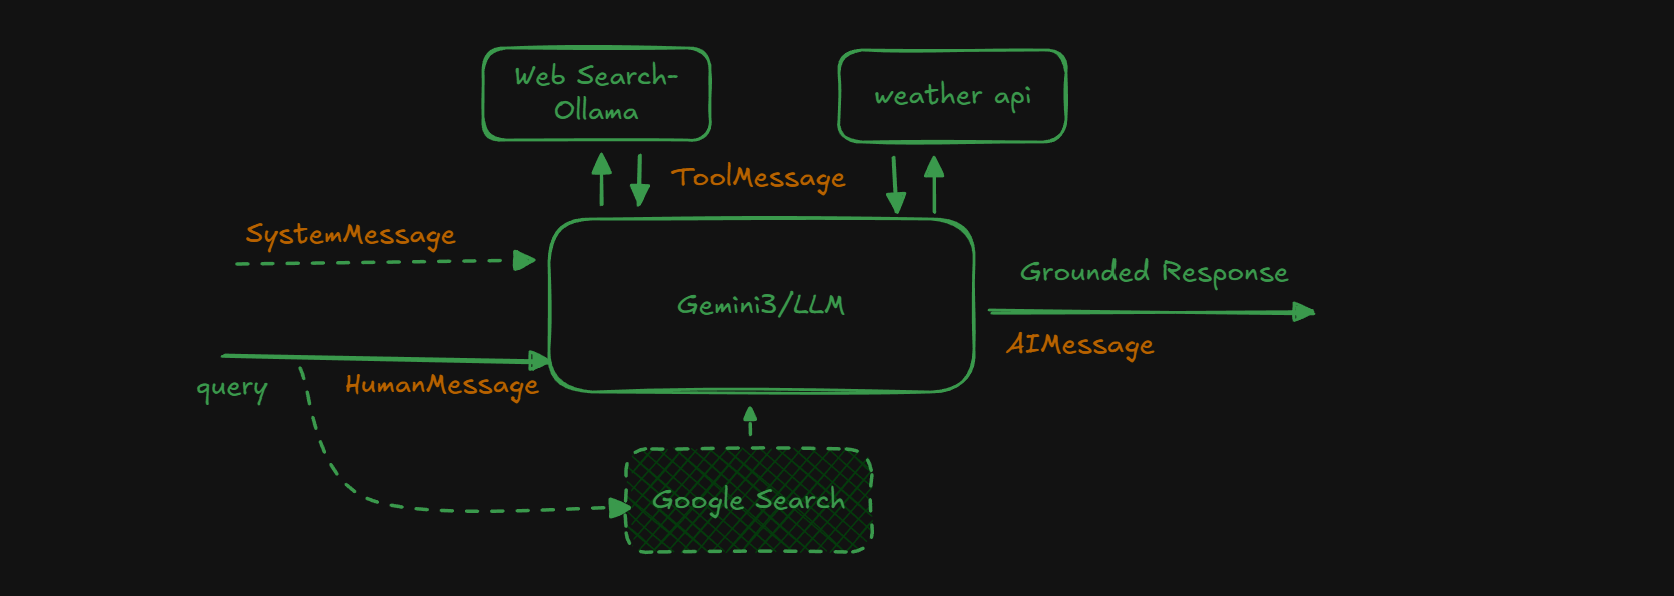

## Gemini 3 Overview

**Gemini 3 Pro** is Google's most intelligent model family, built on state-of-the-art reasoning capabilities.

### Key Features
- **Advanced Reasoning**: Dynamic thinking process with configurable thinking levels
- **1M Token Context**: Up to 1 million token input, 64k token output
- **Multimodal Excellence**: Images, PDFs, audio, video with granular resolution control
- **Knowledge Cutoff**: January 2025
- **Image Generation**: 4K resolution with grounded generation

### Model Variants

| Model | Context (In/Out) | Best For |
|-------|------------------|----------|
| `gemini-3-pro-preview` | 1M / 64k | Complex reasoning, coding, analysis |
| `gemini-3-pro-image-preview` | 65k / 32k | Image generation & editing |
| `gemini-2.5-flash` | 1M / 8k | Fast, cost-effective tasks |

### New Features in Gemini 3
1. **Thinking Level**: Control reasoning depth (`low` or `high`)
2. **Media Resolution**: Granular control per media type (`low`, `medium`, `high`, `ultra_high`)
3. **Temperature**: Keep at default 1.0 (changing can cause degraded performance)
4. **Thought Signatures**: Automatic reasoning context preservation

## Setup

Load environment variables for API authentication.

https://ai.google.dev/gemini-api/docs/pricing

In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
import os
# os.getenv("GOOGLE_API_KEY")

In [3]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.messages import HumanMessage, SystemMessage, AIMessage, ToolMessage

## Basic Usage

Demonstrates basic message formats and response structures for both Gemini 3 and 2.5 models.

In [4]:
gemini3 = 'gemini-3-pro-preview'
gemini2 = 'gemini-2.5-flash'

system_msg = SystemMessage("You are a helpful AI Assistant")
query = HumanMessage("Explain the theory of reletivity in the simple terms")

messages = [system_msg, query]

In [5]:
model = ChatGoogleGenerativeAI(model=gemini3)
response = model.invoke(messages)

In [6]:
# print(response.text)

response.content

[{'type': 'text',
  'text': 'Here is the Theory of Relativity explained in simple terms.\n\nIt was developed by **Albert Einstein** in the early 1900s, and it is actually two different theories put together: **Special Relativity** and **General Relativity**.\n\nHere is the breakdown of both.\n\n---\n\n### 1. The Core Idea: "Everything is Relative"\nImagine you are sitting on a train moving at 50 mph.\n*   To **you**, the luggage next to you isn\'t moving. It is sitting still.\n*   To **someone standing outside** watching the train go by, that luggage is moving at 50 mph.\n\nWho is right? You both are. Motion depends on your point of view (or your "frame of reference").\n\n### 2. Special Relativity (The Speed of Light)\nEinstein noticed one weird exception to the rule above. **The speed of light never changes.**\n\nIf you shine a flashlight from that moving train, the light doesn\'t travel at "Light Speed + Train Speed." It just travels at Light Speed. No matter how fast you move, light

In [7]:
response.content_blocks

[{'type': 'text',
  'text': 'Here is the Theory of Relativity explained in simple terms.\n\nIt was developed by **Albert Einstein** in the early 1900s, and it is actually two different theories put together: **Special Relativity** and **General Relativity**.\n\nHere is the breakdown of both.\n\n---\n\n### 1. The Core Idea: "Everything is Relative"\nImagine you are sitting on a train moving at 50 mph.\n*   To **you**, the luggage next to you isn\'t moving. It is sitting still.\n*   To **someone standing outside** watching the train go by, that luggage is moving at 50 mph.\n\nWho is right? You both are. Motion depends on your point of view (or your "frame of reference").\n\n### 2. Special Relativity (The Speed of Light)\nEinstein noticed one weird exception to the rule above. **The speed of light never changes.**\n\nIf you shine a flashlight from that moving train, the light doesn\'t travel at "Light Speed + Train Speed." It just travels at Light Speed. No matter how fast you move, light

In [8]:
model = ChatGoogleGenerativeAI(model=gemini2)
response = model.invoke(messages)

In [9]:
response.text
response.content
response.content_blocks

[{'type': 'text',
  'text': 'Okay, let\'s break down Einstein\'s Theory of Relativity into its two main parts, Special and General, using simple analogies.\n\nThe core idea is that **space and time are not absolute and fixed things** like a giant grid that everything moves through. Instead, they are **flexible and relative** to an observer\'s motion and gravity.\n\n---\n\n### Part 1: Special Relativity (1905) - All About Constant Speed\n\nImagine you\'re in a car, and you throw a ball forward. To someone standing on the sidewalk, the ball seems to move faster (your car\'s speed + the ball\'s speed). This is intuitive.\n\nSpecial Relativity deals with objects moving at **constant speeds** (no acceleration). It\'s based on two main ideas:\n\n1.  **The Principle of Relativity:** The laws of physics are the same for everyone, no matter how fast they\'re moving, as long as they\'re moving at a constant speed in a straight line. (If you\'re in a windowless train car moving smoothly, you can\

In [10]:
response.usage_metadata

{'input_tokens': 18,
 'output_tokens': 2398,
 'total_tokens': 2416,
 'input_token_details': {'cache_read': 0},
 'output_token_details': {'reasoning': 1235}}

In [11]:
response.response_metadata

{'prompt_feedback': {'block_reason': 0, 'safety_ratings': []},
 'finish_reason': 'STOP',
 'model_name': 'gemini-2.5-flash',
 'safety_ratings': [],
 'model_provider': 'google_genai'}

## Streaming

Stream tokens in real-time as they're generated, improving user experience for long responses.

In [12]:
model = ChatGoogleGenerativeAI(model=gemini2)


In [13]:
query = "Explain the theory of relativity in the simple terms."

for chunk in model.stream(query):
    print(chunk.text, end="", flush=True)

    # break

Okay, let's break down the theory of relativity into its two main parts, Special Relativity and General Relativity, using simple analogies.

**The Core Idea: Everything is Relative (Except the Speed of Light!)**

Imagine you're on a train moving smoothly. If you drop a ball, it falls straight down. If someone outside the train sees you drop the ball, they'd see it fall down *and* move forward with the train. Both observations are correct, but they're relative to the observer's "frame of reference."

Before Einstein, people thought space and time were absolute, like a fixed stage where everything happened. Einstein said, "Nope!"

---

## 1. Special Relativity (1905)

This theory deals with objects moving at a **constant speed** (not accelerating) relative to each other, especially at very high speeds.

**Einstein's Two Big Ideas (Postulates):**

1.  **The laws of physics are the same for everyone moving at a constant speed.** (Like our train example – the laws of physics work the same i

## Multimodal Capabilities

Process images, PDFs, audio, and video alongside text. Gemini 3 supports multiple input modalities with granular resolution control.

In [14]:
model = ChatGoogleGenerativeAI(model=gemini3)


human_msg = HumanMessage(
    [
        {'type': 'text', 'text': 'Describe the image provided'},
        {'type': 'image',
         'url': 'https://www.shutterstock.com/image-vector/vector-cute-baby-panda-cartoon-600nw-2427356853.jpg'}
    ]
)

response = model.invoke([system_msg, human_msg])

In [15]:
response

AIMessage(content=[{'type': 'text', 'text': 'Based on the image provided, here is a detailed description:\n\n**Subject and Pose:**\nThe image features an adorable cartoon panda sitting upright and facing directly forward. The panda has a classic "chubby" and cute aesthetic with a large head and a smaller, rounded body.\n\n**Facial Features:**\n*   **Eyes:** It has very large, expressive black eyes with prominent white highlights (sparkles) and large dark grey patches surrounding them. Small eyelashes are visible on the outer corners.\n*   **Ears:** The ears are round and black with soft pink inner sections.\n*   **Mouth:** The panda is smiling broadly, with a small open mouth revealing a pink tongue.\n*   **Nose:** It has a small, black, button-like nose.\n\n**Body Details:**\n*   **Fur Pattern:** The panda follows the traditional coloring: white face and belly, with black (or dark grey) ears, arms, and legs.\n*   **Paws:** The panda is sitting with its hind legs splayed out to the sid

In [16]:
print(response.text)

Based on the image provided, here is a detailed description:

**Subject and Pose:**
The image features an adorable cartoon panda sitting upright and facing directly forward. The panda has a classic "chubby" and cute aesthetic with a large head and a smaller, rounded body.

**Facial Features:**
*   **Eyes:** It has very large, expressive black eyes with prominent white highlights (sparkles) and large dark grey patches surrounding them. Small eyelashes are visible on the outer corners.
*   **Ears:** The ears are round and black with soft pink inner sections.
*   **Mouth:** The panda is smiling broadly, with a small open mouth revealing a pink tongue.
*   **Nose:** It has a small, black, button-like nose.

**Body Details:**
*   **Fur Pattern:** The panda follows the traditional coloring: white face and belly, with black (or dark grey) ears, arms, and legs.
*   **Paws:** The panda is sitting with its hind legs splayed out to the sides, revealing the bottoms of its feet. The feet feature di

### Image Analysis from Local File

Base64 encode local images, PDFs, or audio files for analysis.

In [17]:
import base64

mime_type = "image/png"

image_bytes = open("data/images/panda.png", 'rb').read()
bytes_base64 = base64.b64encode(image_bytes).decode('utf-8')

In [18]:
bytes_base64

'iVBORw0KGgoAAAANSUhEUgAAAlgAAAJYCAIAAAAxBA+LAAAQAElEQVR4AexdBYBdxdU+M3PlyWrchSDBg7u7eym0pbSlhQql1L39W+rUhXoLtKW0tMUh7u7uttlssm7P7r0j/zfvbTYJJJCEDUTecO7cuSNnzjkzc86cmZeFm2IoSqAogaIEihIoSuAwlgCnYihKoCiBogSKEihK4DCWQNEQHk6DX+S1KIGiBIoSKErgdRIoGsLXiaSYUZRAUQJFCRQlcDhJoGgID6fRLvJ6OEmgyGtRAkUJ7KEEioZwDwVVrFaUQFECRQkUJXBoSqBoCA/NcS1yVZRAUQKHkwSKvL4lCRQN4VsSX7FxUQJFCRQlUJTAwS6BoiE82EewSP9+kYAyebT52Bij81+FOJ8sRkUJFCVw6EjgIDOEh47gi5wc2BIQjKwtZGSMyUU5EFu0ghBCEYoSOCQlUDSEh+SwFpl6qxKA2TNGhxQ2tNVu3VpjyGCpKPVW0RbbFyVQlMABKAGs7gOQqiJJRQkQ0TspBA1LyE1kMrUN1UzYZSI1CfFOklTsuyiBogT2kwTsCt9PqItoixI4eCXgcOKkNQuqtq5PliWJGLM5VAxFCRQlcOhJoGgID70xLXLUBRIwCKRSYUtWpWNJHxhxOhoVz0YhiP0ERbRFCbxzEigawndO9sWeD2QJaMVI1dRtUix0uavIMGIHMr1F2ooSKEpgnyVQNIT7LLpiw0NYAtowDbu3aesm7nBGzGgtiNziJeEhPOZF1t5GCRxoXfEDjaAiPUUJHAgS4NzRRK3tbcmyUkPM4bCDyAAcCNQVaShKoCiBrpRA0RB2pTSLuA4NCcDcKQrbTWs2m6qoqMAiYYcGY0UuihIoSmBXEsAa31V2Ma9LJFBEcrBKQGtStc1bozDs0703UWGZFOKDlaUi3UUJFCWwOwkU1/buJFPMP3wlYAiGMKprqjHalMfKGXVYwsNXIkXOixI4pCVQNISH9PAWmds

In [19]:
model = ChatGoogleGenerativeAI(model=gemini2)


human_msg = HumanMessage(
    [
        {'type': 'text', 'text': 'Describe the image provided'},
        {'type': 'image',
         'base64': bytes_base64,
         "mime_type": mime_type}
    ]
)

response = model.invoke([system_msg, human_msg])

In [20]:
response.pretty_print()

================================== Ai Message ==================================

This is a vibrant and charming cartoon illustration of a baby panda sitting amidst lush green grass.

Here's a detailed description:

*   **Subject:** The central figure is an adorable, chubby panda cub, rendered in a classic cartoon style.
*   **Colors:** It sports the iconic black and white fur. Its face and belly are white, while its ears, eye patches, nose, and limbs are black.
*   **Facial Features:** The panda has large, round, glossy black eyes that convey innocence and cuteness. Its small black nose is oval-shaped, and its mouth is open in a gentle, happy smile, revealing a tiny pink tongue. The inner parts of its round ears are a soft pink.
*   **Body and Pose:** The panda is depicted sitting upright, facing directly forward. Its short, rounded limbs are visible, with its front paws resting on its lap and its hind paws slightly extended. Its paw pads are a subtle pink.
*   **Setting:** The panda 

### PDF Document Analysis

Extract and analyze content from PDF files. Recommended to use `media_resolution_medium` for PDFs.

In [21]:
## Reading media from local file and encoding to base64
## Now use smaller model for faster response

## image mime type example
# mime_type = "image/png", type = image

## pdf mime type example
# mime_type = "application/pdf", type = "file"

## audio mime type example
# mime_type = "audio/mpeg", type = "audio"

# pdf_bytes = open(r'data\rag-data\apple\apple 10-q q1 2024.pdf', 'rb').read()
pdf_bytes = open(r'data\rag-data\pdfs\apple\apple 10-q q1 2024.pdf', 'rb').read()

pdf_base64 = base64.b64encode(pdf_bytes).decode('utf-8')

mime_type = "application/pdf"


human_msg = HumanMessage(
    [
        {'type': 'text', 'text': 'summarize the key financial highlights from this quarterly report.'},
        {'type': 'file',
         'base64': pdf_base64,
         'mime_type': mime_type}
    ]
)


model = ChatGoogleGenerativeAI(model=gemini2)

In [22]:
response = model.invoke([system_msg, human_msg])

In [23]:
print(response.text)

Here's a summary of the key financial highlights from Apple Inc.'s quarterly report for the period ended March 30, 2024:

**Overall Performance (Three Months Ended March 30, 2024 vs. April 1, 2023):**
*   **Total Net Sales:** Decreased by 4% to $90.75 billion from $94.84 billion.
*   **Net Income:** Decreased slightly to $23.64 billion from $24.16 billion.
*   **Basic and Diluted Earnings Per Share (EPS):** Basic EPS remained flat at $1.53, while diluted EPS saw a slight increase to $1.53 from $1.52.

**Performance by Segment (Three Months Ended March 30, 2024 vs. April 1, 2023):**
*   **Product Sales:** Decreased by 9.5% to $66.89 billion from $73.93 billion. This was primarily driven by:
    *   iPhone net sales decreased by 10%.
    *   iPad net sales decreased by 17%.
    *   Wearables, Home and Accessories net sales decreased by 10%.
    *   Mac net sales increased by 4%.
*   **Services Sales:** Increased significantly by 14% to $23.87 billion from $20.91 billion, driven by higher

In [24]:
response.usage_metadata

{'input_tokens': 7242,
 'output_tokens': 2932,
 'total_tokens': 10174,
 'input_token_details': {'cache_read': 0},
 'output_token_details': {'reasoning': 1935}}

## Tool Calling (Function Calling)

Bind custom tools to the model for extended capabilities like web search or API calls.

In [25]:
from scripts import base_tools

In [26]:
response = base_tools.web_search.invoke({'query': "what is the latest stock news"})

In [27]:
response

[WebSearchResult(content="Subscribe to read\n[Accessibility help](https://www.ft.com/accessibility)[Skip to navigation](#site-navigation)[Skip to main content](#site-content)[Skip to footer](#site-footer)\n* [Sign In](https://www.ft.com/login?location=/content/e4ae8299-e0a4-4e36-8c8f-d59b22202284)\n* [Subscribe](https://www.ft.com/products?segmentId=f860e6c2-18af-ab30-cd5e-6e3a456f9265)\n[Open side navigation menu](#o-header-drawer)[Open search bar](#o-header-search-primary)\n[Financial Times](https://www.ft.com/)\n[Subscribe](https://www.ft.com/products?segmentId=f860e6c2-18af-ab30-cd5e-6e3a456f9265)[Sign In](https://www.ft.com/login?location=/content/e4ae8299-e0a4-4e36-8c8f-d59b22202284)\nSearch theFTSearchClose search barClose\n[Menu](#)[Search](#)\n* [Home](https://www.ft.com/)\n* [World](https://www.ft.com/world)\n* [US](https://www.ft.com/us)\n* [Companies](https://www.ft.com/companies)\n* [Tech](https://www.ft.com/technology)\n* [Markets](https://www.ft.com/markets)\n* [Climate]

In [28]:
response = base_tools.get_weather.invoke({'location': 'Mumbai'})

In [29]:
model = ChatGoogleGenerativeAI(model=gemini2)

model_with_tools = model.bind_tools([base_tools.web_search, base_tools.get_weather])

In [30]:
model_with_tools

RunnableBinding(bound=ChatGoogleGenerativeAI(profile={'max_input_tokens': 1048576, 'max_output_tokens': 65536, 'image_inputs': True, 'audio_inputs': True, 'pdf_inputs': True, 'video_inputs': True, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': True, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'image_tool_message': True, 'tool_choice': True}, model='models/gemini-2.5-flash', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x000001CF6901DAE0>, default_metadata=(), model_kwargs={}), kwargs={'tools': [{'type': 'function', 'function': {'name': 'web_search', 'description': 'Perform a live web search using Ollama Cloud Web Search API for real-time information and news.\n\nInput:\n    query: search query string\n\nOutput:\n    JSON string of top results (max_results=2).', 'parameters': {'properties': {'query': {'typ

In [31]:
response = model_with_tools.invoke("What is the weather in mumbai? and What is the US stock news today?")

In [32]:
response

AIMessage(content='', additional_kwargs={'function_call': {'name': 'web_search', 'arguments': '{"query": "US stock news today"}'}, '__gemini_function_call_thought_signatures__': {'6f9a4138-41ac-495e-91fb-1fe34afdc79b': 'CsICAXLI2nyw7ZWITmUQg701JdbBU3n7Srnem0v5bs9o5mg5ZJUVaOECWMwitjULUkgAQg8QfZhf9FyvWMdvjIad8ooUc3ANi2oX2SlQDSNdtAjcdh2MUcNKowENTrfKKMKFGQtXCPDBiEfzhm87mUOWFAaN2sJKaLHmrUM3TC6bvXjrHqkpgBoCUdTWbP/PEuwR3gQtuVaeYUq2n6/wkNyN3n9u8nKzLeXPNvwlHpQx82KgSeqZjEId4Z/h5f0jiVlgExTY6smKGuIVxZo1tV8V2mX+AMDF9z3URAi+wxZaNbTYxaWesjXZms9vBlnMVj8xh9FBk0nnrn2zXJEZMJf3oGKMNIS+OhkQM+MFmHWCyRlqy5aH3r8y2Tc2lBrgn+kbph5qIS7+zwOlEzpGaI7/raRLN9R932ERLSAsigSzmXdYig=='}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019babc3-4963-71e1-9810-715612c7a8d4-0', tool_calls=[{'name': 'get_weather', 'args': {'location': 'Mumbai'}, 'id': '6f9a4138-41ac-

## Thinking Support (Reasoning)

Configure the model's reasoning depth with `thinking_budget` or `thinking_level`. 

**Gemini 3 Recommendation**: Use `thinking_level="high"` (default) for complex tasks, `"low"` for simple tasks.

**Documentation**: https://ai.google.dev/gemini-api/docs/thinking

Control reasoning depth:
- `thinking_budget`: Legacy parameter (number of tokens)
- `thinking_level`: New parameter (`"low"` or `"high"`)
- `include_thoughts`: Show reasoning process in response

In [33]:
model = ChatGoogleGenerativeAI(model=gemini2,
                               thinking_budget=100,
                               include_thoughts=True)

In [34]:
response = model.invoke(query)

In [35]:
response.content_blocks

[{'type': 'reasoning',
  'reasoning': "Okay, here's my take on summarizing the theory of relativity for a fellow expert. Let me break down my thought process:\n\n**Deconstructing the Challenge and Defining Scope**\n\nAlright, I’ve been asked to explain the theory of relativity simply. The key is in those words: “simple terms.” That means I'm not diving into the tensor calculus or the intricacies of the field equations. I'm focusing on the *concepts* – the core ideas that underpin both special and general relativity – but I will not omit either part, as that would be disingenuous. The goal is clarity and conciseness, maybe a few analogies to make the concepts stick, with a minimum of technical jargon. I need to be careful to avoid oversimplification, but also avoid bogging down in minutia.\n\n**Identifying the Key Elements**\n\nNow, I need to get to the heart of what *relativity* actually *is*. First, I need to remember there are two key aspects: special and general relativity, not just

In [36]:
response.usage_metadata

{'input_tokens': 11,
 'output_tokens': 1362,
 'total_tokens': 1373,
 'input_token_details': {'cache_read': 0},
 'output_token_details': {'reasoning': 96}}

In [37]:
model = ChatGoogleGenerativeAI(model=gemini2,
                               thinking_budget=0,
                               include_thoughts=True)

response = model.invoke(query)
response.usage_metadata

{'input_tokens': 11,
 'output_tokens': 869,
 'total_tokens': 880,
 'input_token_details': {'cache_read': 0}}

## Built-in Tools

Google Gemini provides native tools: Google Search and Code Execution. These require no additional setup.

Google Gemini supports a variety of built-in tools, which can be bound to the model in the usual way.

In [38]:
model = ChatGoogleGenerativeAI(model=gemini2)

model_with_tools = model.bind_tools([{'google_search': {}}, {'code_execution': {}}])

In [39]:
response = model_with_tools.invoke(query)

In [40]:
response.content_blocks

[{'type': 'text',
  'text': 'The theory of relativity, developed by Albert Einstein, is essentially about how space and time are relative, not absolute, and how they are intertwined. It has two main parts:\n\n**1. Special Relativity (1905):**\n\n*   **The Core Idea:** This part deals with objects moving at constant speeds in a straight line, without accelerating.\n*   **Key Principles:**\n    *   **The Speed of Light is Constant:** No matter how fast you\'re moving, you\'ll always measure the speed of light in a vacuum to be the same (about 299,792,458 meters per second). This is a mind-bending concept!\n    *   **Laws of Physics are the Same:** The laws of physics are the same for everyone, regardless of their constant speed.\n*   **Consequences (The Weird Stuff):**\n    *   **Time Dilation:** Time passes more slowly for objects that are moving relative to a stationary observer. If you were in a spaceship traveling near the speed of light, a clock on your ship would tick slower than a

In [41]:
query = "When is the next total solar eclipse in the US and what is 3 + 2?"
response = model_with_tools.invoke(query)

c:\Users\laxmi\anaconda3\envs\ml\Lib\site-packages\langchain_google_genai\chat_models.py:1052: UserWarning: 
        - 'executable_code': Always present.
        - 'execution_result' & 'image_url': May be absent for some queries.

        Validate before using in production.

  warnings.warn(


In [42]:
print(response.text)

The answer to 3 + 2 is 5.The next total solar eclipse in the US will be on March 30, 2033, visible only in Alaska. The next total solar eclipse in the contiguous US will be on August 23, 2044, visible in parts of Montana, North Dakota, and South Dakota. A more widespread total solar eclipse across the contiguous US will occur on August 12, 2045.


In [43]:
response.content_blocks

[{'type': 'text', 'text': 'The answer to 3 + 2 is 5.'},
 {'type': 'server_tool_call',
  'name': 'code_interpreter',
  'args': {'code': 'concise_search("next total solar eclipse in US")\n',
   'language': <Language.PYTHON: 1>},
  'id': '6c93d9a1-768a-4511-9ae5-9b9f4c273536'},
 {'type': 'server_tool_result',
  'tool_call_id': '',
  'status': 'success',
  'output': 'Looking up information on Google Search.\n',
  'extras': {'block_type': 'code_execution_result',
   'outcome': <Outcome.OUTCOME_OK: 1>}},
 {'type': 'text',
  'text': 'The next total solar eclipse in the US will be on March 30, 2033, visible only in Alaska. The next total solar eclipse in the contiguous US will be on August 23, 2044, visible in parts of Montana, North Dakota, and South Dakota. A more widespread total solar eclipse across the contiguous US will occur on August 12, 2045.'}]

## Context Caching

Cache large documents to reduce costs and latency for repeated queries. Minimum 2,048 tokens required.

**Benefits**:
- Reduced API costs
- Faster response times
- Ideal for analyzing large documents repeatedly

**Resources**:
- [Caching Guide](https://ai.google.dev/gemini-api/docs/caching?hl=en&lang=python#pdfs_1)
- [Pricing Details](https://ai.google.dev/gemini-api/docs/pricing)

In [44]:
import time
from google import genai
from google.genai.types import CreateCachedContentConfig, Content, Part

In [45]:
client =genai.Client()

In [46]:
client

### Initialize Client and Upload Files

In [47]:
file_paths = [
    "data/rag-data/pdfs/apple/apple 10-q q1 2024.pdf",
    "data/rag-data/pdfs/apple/apple 10-q q2 2024.pdf"
]

uploaded_files = []
for path in file_paths:
    file = client.files.upload(file=path)
    while file.state.name == "PROCESSING":
        time.sleep(2)
        file = client.files.get(name=file.name)

    uploaded_files.append(file)

In [48]:
uploaded_files

[File(
   create_time=datetime.datetime(2026, 1, 11, 6, 34, 51, 583154, tzinfo=TzInfo(0)),
   expiration_time=datetime.datetime(2026, 1, 13, 6, 34, 50, 111836, tzinfo=TzInfo(0)),
   mime_type='application/pdf',
   name='files/4xgo0qgcz6sw',
   sha256_hash='YjE5YjFmMTc2YzVjZWFmOWU2ZWE1MjkwNzAxMzQ4MGViMTc3MTY5NjIzNTFmOGZkZmUwYWQ0YjEzYmIzM2VkMA==',
   size_bytes=280756,
   source=<FileSource.UPLOADED: 'UPLOADED'>,
   state=<FileState.ACTIVE: 'ACTIVE'>,
   update_time=datetime.datetime(2026, 1, 11, 6, 34, 51, 583154, tzinfo=TzInfo(0)),
   uri='https://generativelanguage.googleapis.com/v1beta/files/4xgo0qgcz6sw'
 ),
 File(
   create_time=datetime.datetime(2026, 1, 11, 6, 34, 54, 386987, tzinfo=TzInfo(0)),
   expiration_time=datetime.datetime(2026, 1, 13, 6, 34, 53, 634493, tzinfo=TzInfo(0)),
   mime_type='application/pdf',
   name='files/q7q23upvaaaw',
   sha256_hash='ZDY1YzAyMDM0NThlZjRkZGQ1ZDgwZjU1ZTZjNjVhOTkyODBjNzQzOWI3OTJiZTNiNTkyNDU5ZjRhYmFmN2RhNw==',
   size_bytes=333438,
   source=<

### Create Cache

Cache content for 1800 seconds (30 minutes) with system instructions.

In [49]:
parts = []
for f in uploaded_files:
    part = Part.from_uri(file_uri=f.uri, mime_type=f.mime_type)
    parts.append(part)

contents = [Content(role='user', parts=parts)]

In [50]:
# contents

In [51]:
cache = client.caches.create(
    model=gemini2,
    config=CreateCachedContentConfig(
        display_name = 'Apple Q1 Q2 2024 reports',
        system_instruction="You are a financial analyst. Use these Apple quarterly reports to answer questions.",
        contents=contents,
        ttl='1800s'
    )
)

In [52]:
cache

CachedContent(
  create_time=datetime.datetime(2026, 1, 11, 6, 34, 57, 544313, tzinfo=TzInfo(0)),
  display_name='Apple Q1 Q2 2024 reports',
  expire_time=datetime.datetime(2026, 1, 11, 7, 4, 56, 142360, tzinfo=TzInfo(0)),
  model='models/gemini-2.5-flash',
  name='cachedContents/smu34jclfv58wc1r3sih1emk4t9z07oyto5ds5ie',
  update_time=datetime.datetime(2026, 1, 11, 6, 34, 57, 544313, tzinfo=TzInfo(0)),
  usage_metadata=CachedContentUsageMetadata(
    total_token_count=14465
  )
)

### Query with Cached Content

First query - cache is created and tokens are counted.

In [53]:
model = ChatGoogleGenerativeAI(
    model=gemini2,
    cached_content = cache.name
)

In [54]:
query = "Compare the revenue growth between Q1 and Q2 2024."
response = model.invoke(query)

In [55]:
response.usage_metadata

{'input_tokens': 14482,
 'output_tokens': 2128,
 'total_tokens': 16610,
 'input_token_details': {'cache_read': 14465},
 'output_token_details': {'reasoning': 1643}}

In [56]:
from IPython.display import Markdown, display
display(Markdown(response.text))

Based on the Apple quarterly report for the fiscal quarter ended March 30, 2024 (which is Apple's fiscal Q2 2024), we can derive the revenue for Q1 2024 (fiscal quarter ended December 30, 2023) and directly find the revenue for Q2 2024 (fiscal quarter ended March 30, 2024).

From the "CONDENSED CONSOLIDATED STATEMENTS OF OPERATIONS (Unaudited)" on page 4 of the Q2 2024 report:

*   **Total net sales for the Six Months Ended March 30, 2024 (Q1 + Q2 2024):** $210,328 million
*   **Total net sales for the Three Months Ended March 30, 2024 (Q2 2024):** $90,753 million

To find the revenue for Q1 2024 (Three Months Ended December 30, 2023), we subtract Q2 2024 revenue from the six-month total:

*   **Q1 2024 Revenue:** $210,328 million - $90,753 million = **$119,575 million**

Now, let's compare the revenue growth between Q1 2024 and Q2 2024:

*   **Q1 2024 Revenue:** $119,575 million
*   **Q2 2024 Revenue:** $90,753 million

**Revenue change from Q1 2024 to Q2 2024:**
($90,753 million - $119,575 million) / $119,575 million = -$28,822 million / $119,575 million ≈ -0.2410

Therefore, Apple's total net sales **decreased by approximately 24.10%** from Q1 2024 to Q2 2024.

### Reuse Cache for Second Query

Notice `cache_read` tokens in usage metadata - shows cache is being used.

In [57]:
query = "Provide a detailed analysis of Apple's Q1 and Q2 2024 earnings with key financial metrics, revenue comparison, and growth trends. Format this as bullet points suitable for an infographic."
response = model.invoke(query)

In [58]:
print(response.text)

Here's a detailed analysis of Apple's Q2 2024 and First Half Fiscal Year 2024 earnings, formatted for an infographic based on the provided Q2 2024 quarterly report (for the period ended March 30, 2024):

---

### **Apple Q2 2024 & First Half Fiscal Year 2024 Earnings Snapshot**
*(Data from Apple Inc. Q2 2024 Form 10-Q for the period ended March 30, 2024)*

---

#### **Q2 2024 Performance Highlights**
*(Three Months Ended March 30, 2024 vs. April 1, 2023)*

*   **Total Net Sales:** Decreased 4% to **$90.8 billion** (from $94.8 billion).
*   **Net Income:** Decreased 2% to **$23.6 billion** (from $24.2 billion).
*   **Diluted Earnings Per Share (EPS):** Increased 1% to **$1.53** (from $1.52).
*   **Total Gross Margin:** Increased 1% to **$42.3 billion** (from $42.0 billion).

---

#### **Q2 2024 Revenue Breakdown & Trends**
*(Three Months Ended March 30, 2024 vs. April 1, 2023)*

*   **Products Net Sales:** Decreased 10% to **$66.9 billion**.
    *   **iPhone:** Down 10% to **$46.0 billi

In [59]:
response.usage_metadata

{'input_tokens': 14507,
 'output_tokens': 6157,
 'total_tokens': 20664,
 'input_token_details': {'cache_read': 14465},
 'output_token_details': {'reasoning': 5096}}

## Image Generation

Generate high-quality images up to 4K resolution using `gemini-3-pro-image-preview`.

**Features**:
- Text rendering in images
- Multiple aspect ratios
- Grounded generation with Google Search
- Conversational editing

```
# Available aspect ratios
aspect_ratios = ["1:1", "2:3", "3:2", "3:4", "4:3", "4:5", "5:4", "9:16", "16:9", "21:9"]

# Available resolutions
resolutions = ["1K", "2K", "4K"]
```

https://github.com/langchain-ai/langchain-google/issues/1235

In [60]:
from langchain_google_genai import Modality
from IPython.display import Image
aspect_ratio = "16:9"
resolution = "1K"

In [61]:
image_model = ChatGoogleGenerativeAI(model="gemini-3-pro-image-preview")

image_content = f"Create a professional infographic with this data:\n\n{response.text}"

image_response = image_model.invoke(
    image_content, response_modalities=[Modality.TEXT, Modality.IMAGE]
)

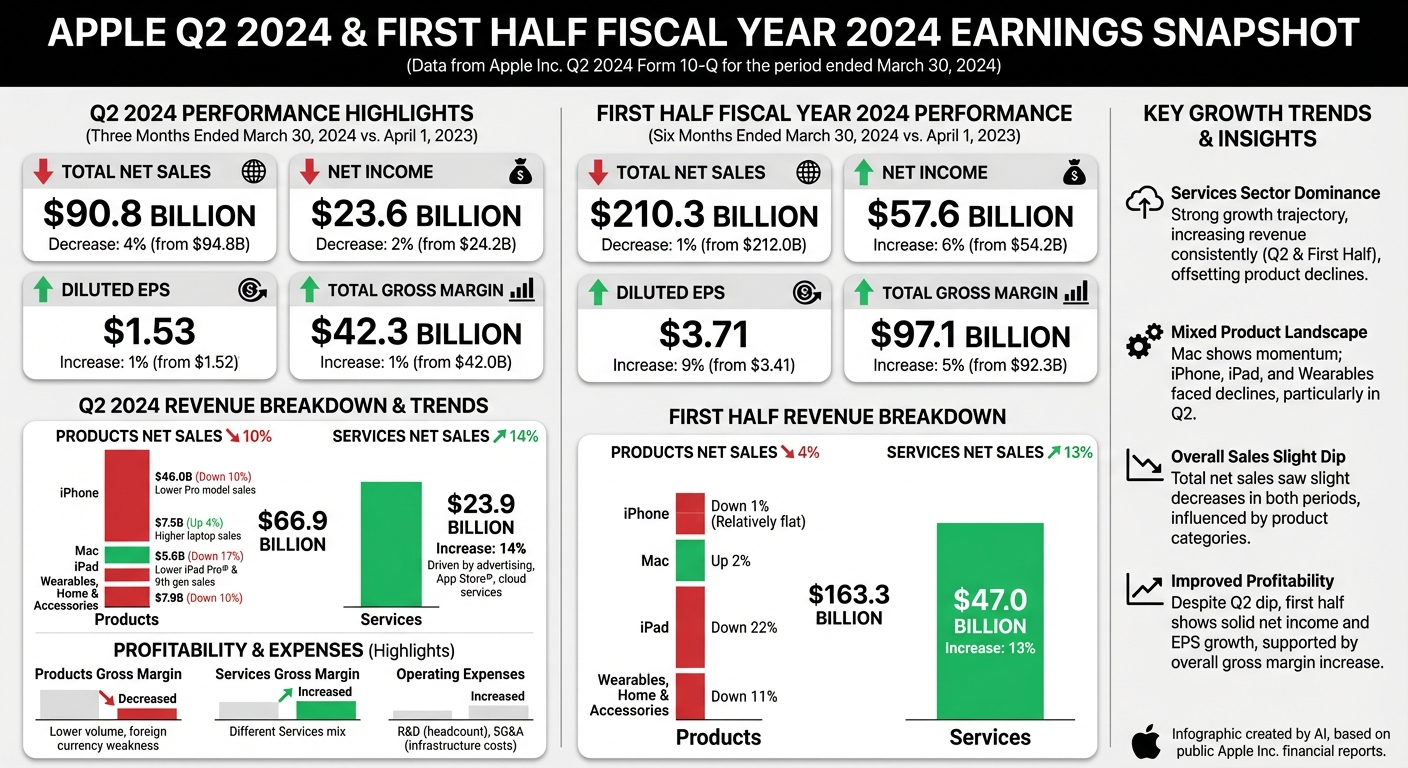

In [62]:
display(Image(base64.b64decode(image_response.content_blocks[0]['base64'])))

In [63]:
with open("data/images/apple_info.png", 'wb') as f:
    f.write(base64.b64decode(image_response.content_blocks[0]['base64']))